<h1><center> MATH 472/572 Computational Statistics - Spring 2020 </h1></center>
<h2><center> Homework 3 - February 6, Thursday </h2></center>
<h3><center> Instructor: Leming Qu </h3></center>

<h1><center> Student: Arash Modaresi Rad </h1></center>

## Coding Assignments:

**(1)** Implement iteratively reweighted least squares (IRLS) algorithm to reproduce the result in
Example 2.5 of Computation Statistics book using. Note that the data set is available from
the book’s webpage
http://www.stat.colostate.edu/computationalstatistics/.

(a) Print your result in the format of table 2.1, using starting value β(0) = (β0(0); β1(0))T =
(0:95913; 0)T , which means πi = 775=1072 for all i at iteration 0.

To see the data in table format install tabulate first:

In [1]:
#pip install tabulate

In [2]:
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import functools as fts
from tabulate import tabulate as tb
import pymc3
from scipy.stats import norm
from scipy.optimize import fmin
from scipy.stats import *
from matplotlib.patches import Polygon
np.random.seed(1000)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\Uchiha_Arash\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
data = pd.read_table("facerecognition.dat", sep="\s+")
data.head()

,match,eyediff,nosecheekdiff,variabilityratio
0,1,0.009683,0.027914,1.086204
1,1,0.027614,0.017821,0.989840
2,1,0.015367,0.025832,1.010983
3,1,0.013371,0.024048,1.012724
4,1,0.011428,0.017801,1.044396


The number of observations

In [4]:
n = len(data)
n

1042

The number of Iterations

In [5]:
itt = 30

The observed response data (1=correct match)

In [6]:
y = data['match']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: match, dtype: int64

Main function

In [7]:
def IRLS(start): 
    ## The covariate matrix ##
    z = pd.DataFrame(data['eyediff'])
    z.insert(0,'ones',1)
    ## The weights ##
    w = pd.DataFrame({ 'W' : np.zeros(n)})
    ## The beta estimates at each iteration ##
    beta = pd.DataFrame(np.zeros((itt + 1, 2)))
    ## The pi estimates at each iteration ##
    pi = pd.DataFrame({ 'pi' : np.zeros(n)})
    ## starting guess: 
    beta[0][0] = start
    i = 0 
    HinvList = []
    for i in range(itt):
        pi = 1/(1+np.exp(-1*np.dot(z,beta.iloc[i])))
        w = pi*(1-pi)
        hessian = pd.DataFrame(np.zeros((2, 2)))
        hessian[0][0] = -np.sum(w)
        hessian[0][1] = -np.dot(pd.DataFrame(w).transpose(), z.iloc[:,1])
        hessian[1][0] = -np.dot(pd.DataFrame(w).transpose(), z.iloc[:,1])
        hessian[1][1] = -np.dot(pd.DataFrame(w).transpose(), (z.iloc[:,1])**2) 
        invH = np.linalg.inv(hessian)
        score = np.dot(pd.DataFrame(z).transpose(), (y-pi))
        betas = beta.iloc[i]-(np.dot(invH, score))
        beta.iloc[i+1,:] = betas
        print(tb([[i, beta.iloc[i,:], invH]], headers=["Iteration Number", "Beta", "Hessian Inverse"],tablefmt='orgtbl'))
    return beta, HinvList 
beta00, HinvList = IRLS(0.95913)    
#beta0 = pd.DataFrame(beta0)
#beta0.rename(columns={0: "Beta", 1: "Beta"})
#HinvList = pd.DataFrame(HinvList)
#HinvList.rename(columns={0: "hessian inverse", 1: "hessian inverse"})
#print(tb(HinvList))

|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  0 | 0    0.95913            | [[-0.01096355  0.11774922]  |
|                    | 1    0.00000            |  [ 0.11774922 -2.24636741]] |
|                    | Name: 0, dtype: float64 |                             |
|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  1 | 0     1.720288          | [[-0.01376919  0.14444378]  |
|                    | 1   -13.909631          |  [ 0.14444378 -2.43426036]] |
|                    | Name: 1, dtype: float64 |                             |
|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  2 | 0     1.757220          | [[-

|                    | Name: 24, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+--------------------------+-----------------------------|
|                 25 | 0     1.758701           | [[-0.01400062  0.14450394]  |
|                    | 1   -13.400040           |  [ 0.14450394 -2.40316692]] |
|                    | Name: 25, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+--------------------------+-----------------------------|
|                 26 | 0     1.758701           | [[-0.01400062  0.14450394]  |
|                    | 1   -13.400040           |  [ 0.14450394 -2.40316692]] |
|                    | Name: 26, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+------------------

(b) Print your result in the format of table 2.1, using starting value β(0) = (β0(0); β1(0))T =
(0; 0)T , which means πi = 0:5 for all i at iteration 0.

In [8]:
beta11, HinvList = IRLS(0)  

|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  0 | 0    0.0                | [[-0.00878375  0.09433803]  |
|                    | 1    0.0                |  [ 0.09433803 -1.79973903]] |
|                    | Name: 0, dtype: float64 |                             |
|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  1 | 0     1.501613          | [[-0.01246462  0.12936371]  |
|                    | 1   -11.144084          |  [ 0.12936371 -2.21900238]] |
|                    | Name: 1, dtype: float64 |                             |
|   Iteration Number | Beta                    | Hessian Inverse             |
|--------------------+-------------------------+-----------------------------|
|                  2 | 0     1.744403          | [[-

|                    | Name: 21, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+--------------------------+-----------------------------|
|                 22 | 0     1.758701           | [[-0.01400062  0.14450394]  |
|                    | 1   -13.400040           |  [ 0.14450394 -2.40316692]] |
|                    | Name: 22, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+--------------------------+-----------------------------|
|                 23 | 0     1.758701           | [[-0.01400062  0.14450394]  |
|                    | 1   -13.400040           |  [ 0.14450394 -2.40316692]] |
|                    | Name: 23, dtype: float64 |                             |
|   Iteration Number | Beta                     | Hessian Inverse             |
|--------------------+------------------

(c) Making a single plot similar to Figure 2.7 showing the solution paths in part (a) and part
(b).

First estimate the log likelihood values for the figure:

In [9]:
def llFunc (y, X, B):
    X.insert(0,'X0',1)
    p = 1/(1+np.exp(-1*np.dot(X,B)))
    logL = np.dot(np.dot((y.T), X),B) - np.sum(-np.log(1-p))
    return logL

In [10]:
i = 0
beta0 = np.linspace(-10,10,100)
beta1 = np.linspace(-40,40,100)
betaX, betaY = np.meshgrid(beta0, beta1)
likelihood_space = np.full_like(betaX, np.nan, dtype=float)
for i in range(betaX.size):
    B = (betaX.flat[i], betaY.flat[i])
    likelihood_space.flat[i] = llFunc(pd.DataFrame(data['match']),pd.DataFrame(data['eyediff']),pd.DataFrame(B))


Now start plotting:

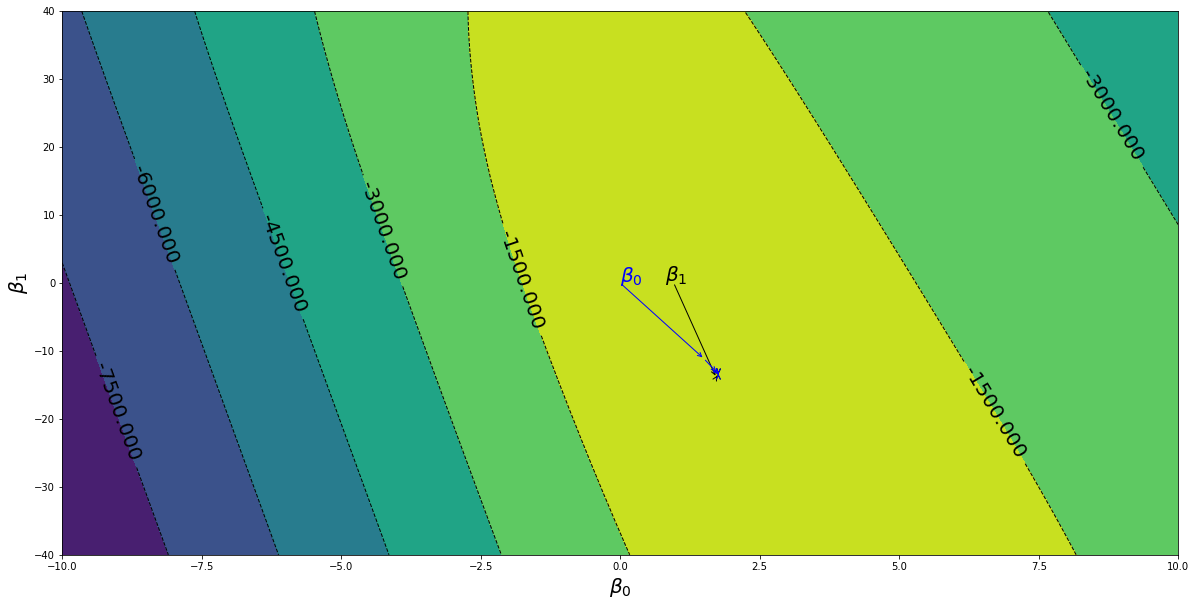

In [11]:
plt.figure(figsize=(20,10))
W0 = np.array(beta00)
W1 = np.array(beta11)
cp = plt.contour(betaX, betaY, likelihood_space, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=20)
for i in range(len(beta00) - 1):
    plt.annotate('', xy=W0[i + 1, :], xytext=W0[i, :], arrowprops={'arrowstyle': '->', 'color': 'k', 'lw': 1}, va='center', ha='center')
for i in range(len(beta11) - 1):
    plt.annotate('', xy=W1[i + 1, :], xytext=W1[i, :], arrowprops={'arrowstyle': '->', 'color': 'b', 'lw': 1}, va='center', ha='center')
plt.text(0, 1, r'$\beta_0$', verticalalignment='center', fontsize=20,color='b')
plt.text(1, 0.25, r'$\beta_1$', horizontalalignment='center', fontsize=20,color='k')
cp = plt.contourf(betaX, betaY, likelihood_space, )
plt.xlabel(r'$\beta_0$',fontsize=20)
plt.ylabel(r'$\beta_1$',fontsize=20)
plt.show()

**(2)** Problem 2.1 on page 54 of the Computation Statistics book

In [12]:
x = [1.77, -0.23, 2.76, 3.80, 3.47, 56.75, -1.34, 4.24, -2.44, 3.29, 3.71, -2.40, 4.53, -0.07, -1.05, -13.87, -2.53, -1.75, 0.27, 43.21]

a. Graph the log likelihood function. Find the MLE for θ using the Newton–Raphson
method. Try all of the following starting points: −11, −1, 0, 1.5, 4, 4.7, 7, 8, and 38. Discuss your results. Is the mean of the data a good starting point?

In [13]:
start = [-11, -1, 0, 1.5, 4, 4.7, 7, 8, 38]

The likelihood function is computed as:

\begin{equation*}
L(\theta) = \prod_{i=1}^{n} f(x_i|\theta) = \frac{1}{\pi^n} \prod_{i=1}^{n} \frac{1}{\left(1 + \left(x_i - \theta \right)^2 \right)}
\end{equation*}

\begin{equation*}
l(\theta) = -n\log(\pi) - \sum_{i=1}^{n} \log\left(1 + \left(x_i - \theta \right)^2 \right)
\end{equation*}

\begin{equation*}
l'(\theta) = \frac{dl(\theta)}{d\theta} = \sum_{i=1}^{n} \frac{ 2\left(x_i - \theta \right)}{\left(1 + \left(x_i - \theta \right)^2 \right)}
\end{equation*}

\begin{equation*}
l"(\theta) = \frac{dl^2(\theta)}{d\theta} = 2\sum_{i=1}^{n} \frac{\left(x_i - \theta \right)^2 - 1}{\left(1 + \left(x_i - \theta \right)^2 \right)^2}
\end{equation*}

Text(0, 0.5, '$\\log L(\\theta)$')

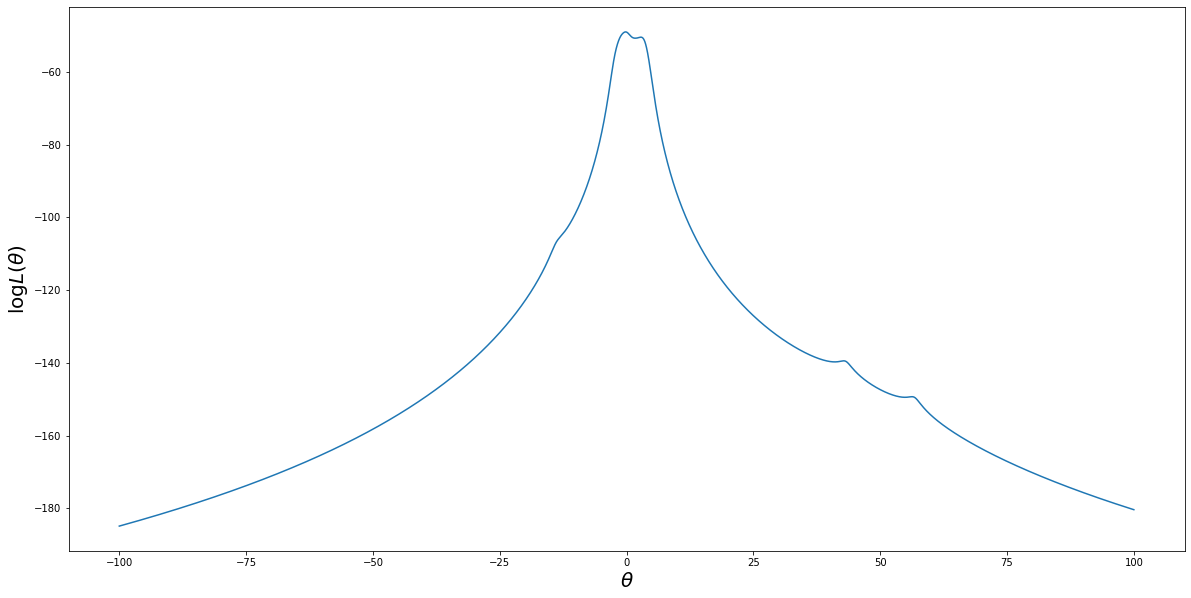

In [14]:
TtList = []
def likFunc(tt): 
    for i in range(len(tt)):
        Ttot = 1 
        for j in range(len(x)):
            Ttot += -np.log(1+((x[j]-tt[i])**2))
        TtList.append(Ttot)    
    return TtList 

t = np.arange(-100, 100, 0.001, 'float')
l = likFunc(t)
plt.figure(figsize=(20,10))
plt.plot(t, l)
plt.xlabel(r'$\theta$',fontsize=20)
plt.ylabel(r'$\log L(\theta)$',fontsize=20)

Text(0, 0.5, '$\\log L_{prime}(\\theta)$')

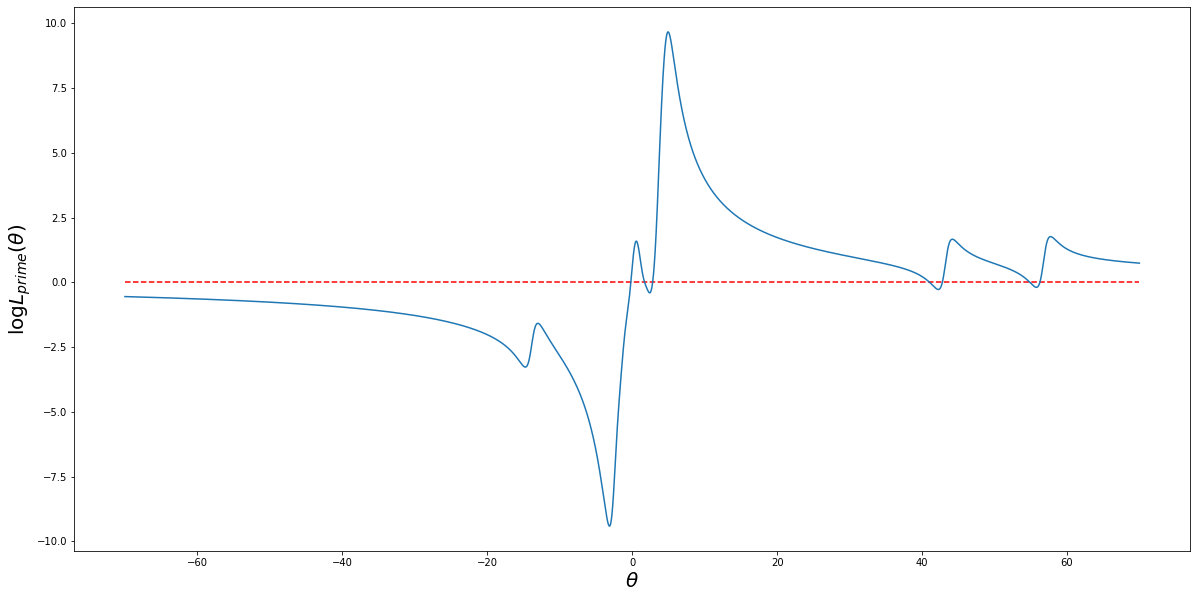

In [15]:
TtList = []
def likFuncPrime(tt): 
    for i in range(len(tt)):
        Ttot = 0 
        for j in range(len(x)):
            Ttot += 2*(-x[j]+tt[i])/(1+((x[j]-tt[i])**2))
        TtList.append(Ttot)    
    return TtList 

t = np.arange(-70, 70, 0.01, 'float')
lp = likFuncPrime(t)
plt.figure(figsize=(20,10))
plt.plot(t, lp)
plt.hlines(y=0,xmin=-70,xmax=70,color='r', linestyle='--')
plt.xlabel(r'$\theta$',fontsize=20)
plt.ylabel(r'$\log L_{prime}(\theta)$',fontsize=20)

In [16]:
def D1loglikFunc(tt): 
    Ttot = 0 
    for j in range(len(x)):
        Ttot += -2*(x[j]-tt)/(1+((x[j]-tt)**2))     
    return Ttot 

def D2loglikFunc(tt): 
    Ttot = 0 
    for j in range(len(x)):
        Ttot += 2*(((-x[j]+tt)**2) - 1)/((1+((x[j]-tt)**2))**2)     
    return Ttot 

def Step_Size2(tt):
    return -D1loglikFunc(tt) / D2loglikFunc(tt)

def NR(Start):
    itt = 0
    i = 0
    eps = 0.001
    xt = Start
    xt_list = []
    et_list = []
    for i in range(10000):
        xt0 = xt
        xt = xt0 + Step_Size2(xt0)
        error_criterion = np.absolute(xt - xt0)
        itt = itt + 1
        xt_list.append(xt0)
        et_list.append(error_criterion)
        if error_criterion < eps:
            print('Solution found based on starting value of ' + str(Start) +  ' : ' + str(xt))
            print('Itteration: ' + str(itt))
            break
        elif itt == 10000:
            print("The maximum number of itterations reached!") 

In [17]:
for k in range(len(start)):
    NR(start[k])

Solution found based on starting value of -11 : 1.7154476609720652
Itteration: 1317
Solution found based on starting value of -1 : -0.1925168190899983
Itteration: 1967
Solution found based on starting value of 0 : 2.8178712279111506
Itteration: 4343
Solution found based on starting value of 1.5 : 2.8190236481654187
Itteration: 391
Solution found based on starting value of 4 : -0.19427163595915967
Itteration: 331
Solution found based on starting value of 4.7 : 2.8169508301336177
Itteration: 688
Solution found based on starting value of 7 : 2.81888532518953
Itteration: 485
Solution found based on starting value of 8 : 2.818205496717459
Itteration: 53
Solution found based on starting value of 38 : 1.714278765902548
Itteration: 3557


The mean of Data:

In [18]:
Meanx = np.mean(x)
start_time = time.time()
NR(Meanx)
Newton_time = time.time() - start_time
print("--- %s seconds ---" % Newton_time)

Solution found based on starting value of 5.106 : -0.19341514490330625
Itteration: 2977
--- 0.4547152519226074 seconds ---


We can see that both results from having diffrent starting values and figures above that the score function has multiple roots and therefore depending on where the starting point is the solution may be a local or global maximum. 

b. Apply the bisection method with starting points −1 and 1. Use additional runs
to illustrate manners in which the bisection method may fail to find the global
maximum.

Initial guess:

In [19]:
def Bisec(a, b, itr):
    ans = a+(b-a)/2
    for i in range(itr):
        if (D1loglikFunc(a)*D1loglikFunc(ans) < 0):
            b = ans
        else:
            a = ans
        ans = a+(b-a)/2
    return ans
                         

In [20]:
start_time = time.time()
ans = Bisec(-1, 1, 30)
Bisection_time = time.time() - start_time
print("--- %s seconds ---" % Bisection_time)   

--- 0.0019981861114501953 seconds ---


In [21]:
ans

-0.19228661339730024

In [22]:
Bisec(-3, 8, 30)

2.8174721649847925

from the algorithem and the convergence of the bisection method we can see that If pur function has more than one root in the starting interval, it is easy to see that bisection will find one of them, but will not find the rest! So it is important to know that this method will be only be able to return a singel local or a golbal maximum.

c. Apply fixed-point iterations as in (2.29), starting from −1, with scaling choices
of α = 1, 0.64, and 0.25. Investigate other choices of starting values and scaling
factors.

Initial guess:

In [23]:
alphas = [1, 0.64, 0.25]
ans = -1
itr = 10000


In [24]:
def Fixed(alpha, ans, itr):
    itt = 0
    for i in range(itr):
        ans0 = ans
        ans = ans + (alpha * D1loglikFunc(ans))
        error_criterion = np.absolute(ans - ans0)
        itt = itt + 1
        if error_criterion < 0.01:
            print('Solution found based on alpha value of ' + str(alpha) + ' and iteration +' + str(itt) + ': ' + str(ans))
            break
        elif itt == 10000:
            print("The maximum number of itterations reached!") 

In [25]:
Fixed(alphas[0], ans, itr)

The maximum number of itterations reached!


In [26]:
Fixed(alphas[1], ans, itr)

The maximum number of itterations reached!


In [27]:
Fixed(alphas[2], ans, itr)

The maximum number of itterations reached!


With the starting point of -1 the algorithem does not converge, however, if we change the starting point to 1 we can see:

In [28]:
ans = 1

In [29]:
Fixed(alphas[0], ans, itr)

Solution found based on alpha value of 1 and iteration +5: 1.7138700043932706


In [30]:
Fixed(alphas[1], ans, itr)

Solution found based on alpha value of 0.64 and iteration +2: 1.711876500354545


In [31]:
start_time = time.time()
Fixed(alphas[2], ans, itr)
FixedPoin_time = time.time() - start_time
print("--- %s seconds ---" % FixedPoin_time)

Solution found based on alpha value of 0.25 and iteration +10: 1.6848059758868772
--- 0.0010006427764892578 seconds ---


The reults indicate that the choice of the starting values is extremly important as in the first case chosing a starting value of `-1` regardless of the the choice of alpha result in algorithem not being able to converge! However, once the starting value is set to `1` the algorithem converges for diffrent values of alpha parameter. We can also see that the choice of alpha can significantly impact the reesults such that for the two cases of `[1, 0.64]` the algorithem finds a different local maximum compared to alpha = `0.25`.

d. From starting values of (θ(0), θ(1)) = (−2, −1), apply the secant method to estimate θ. What happens when (θ(0), θ(1)) = (−3, 3), and for other starting choices?

In [32]:
def D1loglikFuncup(tt): 
    Ttot = 0 
    for j in range(len(x)):
        Ttot += 2*(-x[j]+tt)/(1+((x[j]-tt)**2))     
    return Ttot 

In [33]:
def secant(a,b,N):
    if D1loglikFuncup(a)*D1loglikFuncup(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - D1loglikFuncup(a_n)*(b_n - a_n)/(D1loglikFuncup(b_n) - D1loglikFuncup(a_n))
        f_m_n = D1loglikFuncup(m_n)
        if D1loglikFuncup(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif D1loglikFuncup(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - D1loglikFuncup(a_n)*(b_n - a_n)/(D1loglikFuncup(b_n) - D1loglikFuncup(a_n))

In [34]:
secant(-2,-1,10000)

Secant method fails.


In [35]:
secant(-3,3,10000)

2.8174721655731316

In [36]:
secant(-1,10,10000)

2.8174721655731316

In [37]:
secant(0,5,10000)

Secant method fails.


In [38]:
start_time = time.time()
secant(-1,10,10000)
secant_time = time.time() - start_time
print("--- %s seconds ---" % secant_time) 

--- 0.8654589653015137 seconds ---


The Secant method has the order of convergance equall to 1.62, so it is a slower algorithem compared to the previous methods except for Newton. Simillar to the previous methods the choice of starting point has a significant imapct on the answer for this problem therefore, as it can be seen from above the choices of ` (θ(0), θ(1)) = (−2, −1)`, `(θ(0), θ(1)) = (−3, 3)`, `(θ(0), θ(1)) = (-1, 10)` and `(θ(0), θ(1)) = (0, 5)` all result in different anwswers, where some dont converge at all.

e. Use this example to compare the speed and stability of the Newton–Raphson
method, bisection, fixed-point iteration, and the secant method. Do your conclusions change when you apply the methods to a random sample of size 20 from a
N(θ, 1) distribution?

Printing a table of time spent on each algorithem in `secconds`

In [39]:
 print(tb([[Newton_time, Bisection_time, FixedPoin_time, secant_time]], headers=["Newton_time", "Bisection_time", "FixedPoin_time", "secant_time"],tablefmt='orgtbl'))

|   Newton_time |   Bisection_time |   FixedPoin_time |   secant_time |
|---------------+------------------+------------------+---------------|
|      0.454715 |       0.00199819 |       0.00100064 |      0.865459 |


Based on the this table the Secant method requires the highest amount of time to converge to a solution and after that Newton method has a highly computaionally demanding. The other two methods including Bisection and Fixedpoint are almost identincal in computation time and are less demanding.

Create a random sample of 20 values for x and repeat the process:

In [40]:
x = np.random.normal(0, 1, 20)

In [41]:
Meanx = np.mean(x)
start_time = time.time()
NR(Meanx)
Newton_time = time.time() - start_time
print("--- %s seconds ---" % Newton_time)

Solution found based on starting value of -0.060039536957600836 : -0.07682298954024881
Itteration: 1740
--- 0.2738306522369385 seconds ---


In [42]:
a = -1
b = 1
ans = a+(b-a)/2
itr = 30
start_time = time.time()
for i in range(itr):
    if (D1loglikFunc(a)*D1loglikFunc(ans) < 0):
        b = ans
    else:
        a = ans
    ans = a+(b-a)/2
Bisection_time = time.time() - start_time
print("--- %s seconds ---" % Bisection_time)  

--- 0.003997325897216797 seconds ---


In [43]:
start_time = time.time()
Fixed(alphas[2], ans, itr)
FixedPoin_time = time.time() - start_time
print("--- %s seconds ---" % FixedPoin_time)

Solution found based on alpha value of 0.25 and iteration +1: -0.0773175303883947
--- 0.0010001659393310547 seconds ---


In [44]:
start_time = time.time()
secant(0,5,10000)
secant_time = time.time() - start_time
print("--- %s seconds ---" % secant_time) 

Secant method fails.
--- 0.0019958019256591797 seconds ---


In [45]:
 print(tb([[Newton_time, Bisection_time, FixedPoin_time, secant_time]], headers=["Newton_time", "Bisection_time", "FixedPoin_time", "secant_time"],tablefmt='orgtbl'))

|   Newton_time |   Bisection_time |   FixedPoin_time |   secant_time |
|---------------+------------------+------------------+---------------|
|      0.273831 |       0.00399733 |       0.00100017 |     0.0019958 |


The same process was repeated for different algorithems using the new random arrey of x and the results suggest that changing the values of x does not conisderably changes the time required for convergance. Also most of the descrepencies between this table and the previou table is most likely related to CPU, cache and its tempreture.

**(3)** Problem 2.4 on page 56 of the Computation Statistics book. Required output: A single Plot
including (a) the Gamma(2,1) probability density, (2) the lower and the upper end of the
interval clearly marked on the x-axis, (3) the region under the density curve and above the
between the 95% highest posterior density interval.

A parameter θ has a Gamma(2, 1) posterior distribution. Find the 95% highest posterior
density interval for θ, that is, the interval containing 95% of the posterior probability for
which the posterior density for every point contained in the interval is never lower than
the density for every point outside the interval. Since the gamma density is unimodal,
the interval is also the narrowest possible interval containing 95% of the posterior
probability.

A minimization method is used to find the width of lowertail probability interval.

In [46]:
def HDIofICDF(dist_name, credMass, alpha):
    def intervalWidth(lowTailPr):
        return distri.ppf(credMass + lowTailPr) - distri.ppf(lowTailPr)
    distri = dist_name(alpha)
    incredMass =  1.0 - credMass
    HDIlowTailPr = fmin(intervalWidth, incredMass, ftol=1e-8, disp=False)[0]
    return distri.ppf([HDIlowTailPr, credMass + HDIlowTailPr])

A posterior distribution for the parameter  
θ
  is Gamma 
(
n
x
+
α
,
n
+
β
)
 . Now the lower and the upper end of the interval with 95% confidence is calculate as and is shown in figure below

In [47]:
alpha = 2
beta = 1
HPDI=HDIofICDF(gamma, 0.95, alpha)
print ('Highest value for posterior density interval is: ',HPDI)

Highest value for posterior density interval is:  [0.0423737  4.76517862]


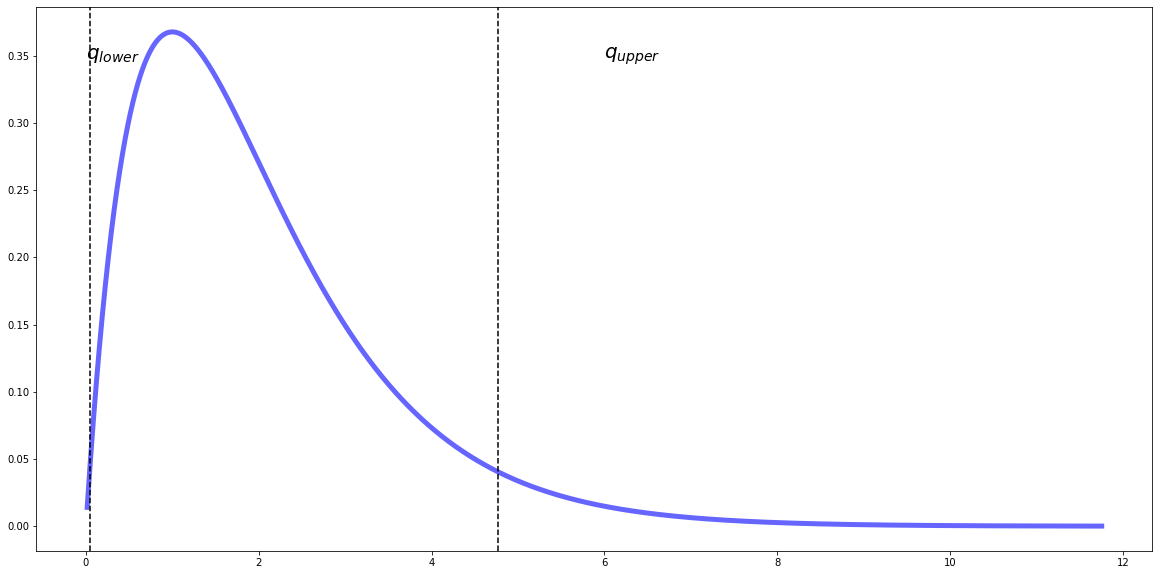

In [48]:
plt.figure(figsize=(20,10))
x = np.linspace(gamma.ppf(0.0001, alpha),gamma.ppf(0.9999, alpha), 1000000)
plt.plot(x, gamma.pdf(x, alpha),'b', lw=5, alpha=0.6, label='pdf')
plt.axvline(x=HPDI[0],color='k', linestyle='--')
plt.text(0, 0.35, r'$q_{lower}$', verticalalignment='center', fontsize=20,color='k')
plt.axvline(x=HPDI[1],color='k', linestyle='--')
plt.text(6, 0.35, r'$q_{upper}$', verticalalignment='center', fontsize=20,color='k')
plt.show()

So the region under the density curve between the 95% highest posterior density interval can be computed as:

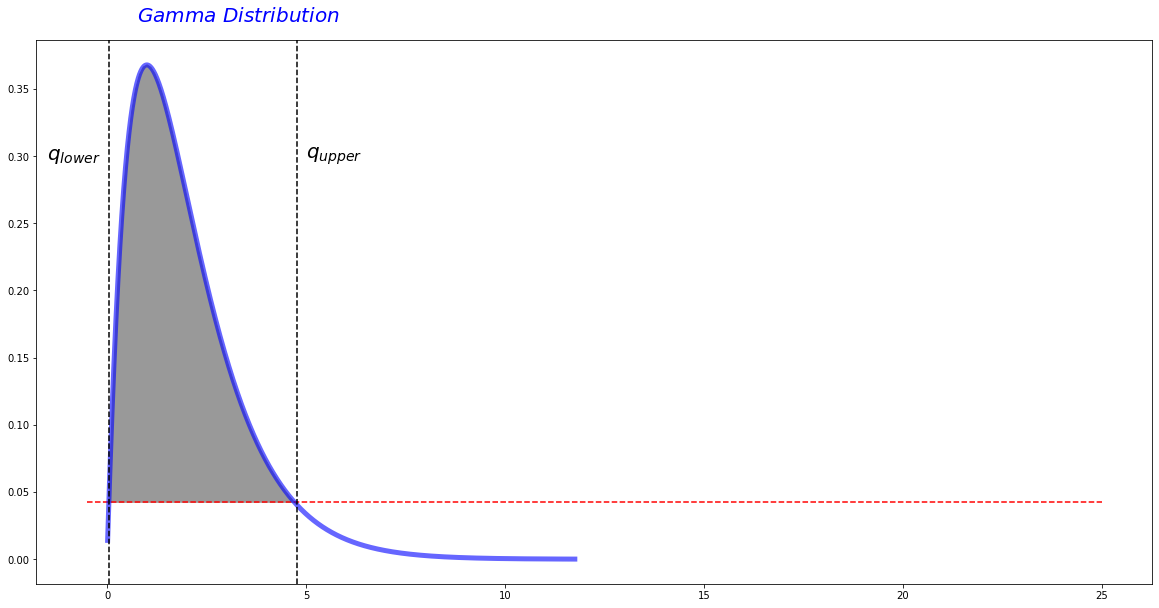

In [49]:
fig, ax = plt.subplots(figsize=(20,10))
ix = np.linspace(HPDI[0], HPDI[1])
iy = gamma.pdf(ix, alpha)
verts = [(HPDI[0],HPDI[0]), *zip(ix, iy), (HPDI[1], HPDI[0])]
poly = Polygon(verts, facecolor='0.6', edgecolor='0.6')
ax.add_patch(poly)
x = np.linspace(gamma.ppf(0.0001, alpha),gamma.ppf(0.9999, alpha), 1000000)
ax.plot(x, gamma.pdf(x, alpha),'b', lw=5, alpha=0.6, label='pdf')
ax.axvline(x=HPDI[0],color='k', linestyle='--')
ax.text(-1.5, 0.3, r'$q_{lower}$', verticalalignment='center',fontsize=20,color='k')
ax.axvline(x=HPDI[1],color='k', linestyle='--')
ax.text(5, 0.3, r'$q_{upper}$', verticalalignment='center', fontsize=20,color='k')
ax.text(3.3, 0.4, r'$Gamma\ Distribution$', horizontalalignment='center', fontsize=20,color='b')
ax.hlines(y=HPDI[0],xmin=-0.5,xmax=25,color='r', linestyle='--')
plt.show()

## Non-Coding Assignments:

**(4)** Observations Y1; : : : ; Yn are described by the relationship Yi = θx2 i + i, where x1; : : : ; xn are
fixed constants and 1; : : : ; n are iid N(0; σ2).

(a) Find the least squares estimator of θ.

\begin{equation*}
F(\theta) = \sum_{i=1}^{n} \left(y_i-\theta {x_i}^2 \right)^2 
\end{equation*}

\begin{equation*}
\frac{\sigma F}{\sigma \theta}  = -2\sum_{i=1}^{n} {x_i}^2\left(y_i-\theta {x_i}^2 \right) = -2\sum_{i=1}^{n}{x_i}^2 y_i + 2\theta \sum_{i=1}^{n}{x_i}^4 = 0
\end{equation*}

\begin{equation*}
\theta \sum_{i=1}^{n} {x_i}^4 = \sum_{i=1}^{n} {x_i}^2 y_i 
\end{equation*}

\begin{equation*}
\theta = \frac{\sum_{i=1}^{n} {x_i}^2 y_i }{\sum_{i=1}^{n} {x_i}^4}  
\end{equation*}

(b) Find the MLE of θ

\begin{equation*}
L(\theta) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi{\alpha}^2}} \exp{-\frac{1}{2} \frac{\left(x_i-\theta {x_i}^2\right)^2}{\sigma^2}} = \left(\frac{1}{\sqrt{2\pi{\alpha}^2}} \right)^n \exp{\sum_{i=1}^{n} -\frac{1}{2} \frac{\left(x_i-\theta {x_i}^2\right)^2}{\sigma^2}  }
\end{equation*}

\begin{equation*}
l(\theta) = -n\log{\sqrt{2\pi{\alpha}^2}} + \sum_{i=1}^{n}-\frac{1}{2} \frac{\left(x_i-\theta {x_i}^2\right)^2}{\sigma^2}     
\end{equation*}

\begin{equation*}
l'(\theta) = 0 + \frac{1}{\sigma^2} \sum_{i=1}^{n} {x_i}^2 \left(x_i-\theta {x_i}^2\right)^2  = 0
\end{equation*}

\begin{equation*}
\theta \sum_{i=1}^{n} {x_i}^4 = \sum_{i=1}^{n} {x_i}^3
\end{equation*}

\begin{equation*}
\theta = \frac{\sum_{i=1}^{n} {x_i}^3}{\sum_{i=1}^{n} {x_i}^4}
\end{equation*}